In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [10]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, weekly_seasonality=True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/wnu8rshm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/3leux4jr.json
22:47:04 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=70558', 'data', 'file=/tmp/tmplnvzjdhf/wnu8rshm.json', 'init=/tmp/tmplnvzjdhf/3leux4jr.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelb0g0ax_u/prophet_model-20241118224704_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=70558', 'data', 'file=/tmp/tmplnvzjdhf/wnu8rshm.json', 'init=/tmp/tmplnvzjdhf/3leux4jr.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelb0g0ax_u/prophet_model-20241118224704_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

22:47:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=70558', 'data', 'file=/tmp/tmplnvzjdhf/wnu8rshm.json', 'init=/tmp/tmplnvzjdhf/3leux4jr.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelb0g0ax_u/prophet_model-20241118224704_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelb0g0ax_u/prophet_model-20241118224704_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelb0g0ax_u/prophet_model-20241118224704_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [11]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,3.063504e+06,2.503561e+06,3.252681e+06,2.822960e+06,3.235040e+06,-1.837895e+05,-6.927115e+05,3.061906e+05,42315.800097,-299087.268933,283786.723242,-2.261053e+05,-7.003612e+05,8.663741e+04,0.0,0.0,0.0,2.879714e+06
1,2022-04-30,3.046572e+06,2.759300e+06,3.752454e+06,2.803231e+06,3.233791e+06,1.600906e+05,-2.365933e+05,3.788122e+05,76439.622794,-298256.097728,523805.218875,8.365096e+04,-3.270282e+05,4.316207e+05,0.0,0.0,0.0,3.206663e+06
2,2022-05-31,3.030251e+06,1.897627e+06,3.404815e+06,2.787322e+06,3.257574e+06,-1.030728e+05,-4.769008e+05,3.256847e+05,212388.015128,-2819.450705,473934.548923,-3.154608e+05,-7.089876e+05,1.204512e+05,0.0,0.0,0.0,2.927178e+06
3,2022-06-30,3.014217e+06,2.239690e+06,3.122992e+06,2.754676e+06,3.216641e+06,-1.804084e+05,-7.468325e+05,2.415576e+05,42315.800096,-299087.268937,283786.723239,-2.227242e+05,-5.302240e+05,1.053556e+05,0.0,0.0,0.0,2.833809e+06
4,2022-07-31,2.999160e+06,1.583860e+06,2.714202e+06,2.748373e+06,3.212689e+06,-4.663646e+05,-8.478601e+05,-5.552848e+04,-390903.584144,-491115.322409,-46298.566551,-7.546100e+04,-5.419262e+05,2.326907e+05,0.0,0.0,0.0,2.532795e+06
5,2022-08-31,2.986003e+06,2.280914e+06,3.244164e+06,2.740736e+06,3.201325e+06,-4.211908e+05,-7.835206e+05,-9.981555e+04,77533.237053,-310898.776680,391361.111667,-4.987240e+05,-8.680090e+05,-2.232165e+05,0.0,0.0,0.0,2.564812e+06
6,2022-09-30,2.972775e+06,1.984260e+06,2.837258e+06,2.734222e+06,3.177947e+06,-4.331499e+05,-8.666848e+05,-3.270871e+04,471323.617386,90375.767291,775309.492830,-9.044735e+05,-1.162988e+06,-4.700940e+05,0.0,0.0,0.0,2.539625e+06
7,2022-10-31,2.958275e+06,2.355561e+06,3.511497e+06,2.724009e+06,3.173928e+06,-1.167779e+05,-5.698745e+05,4.612549e+05,-489096.708315,-943958.654914,63845.498801,3.723188e+05,-2.265844e+05,8.056219e+05,0.0,0.0,0.0,2.841497e+06
8,2022-11-30,2.944006e+06,2.499035e+06,3.578646e+06,2.697366e+06,3.129968e+06,-8.739212e+04,-2.759484e+05,1.170335e+05,77533.237054,-310898.776679,391361.111668,-1.649254e+05,-4.094547e+05,2.341572e+05,0.0,0.0,0.0,2.856614e+06
9,2022-12-31,2.931773e+06,2.335789e+06,3.269323e+06,2.670623e+06,3.125701e+06,-1.060243e+05,-4.979470e+05,1.942597e+05,76439.622796,-298256.097726,523805.218877,-1.824639e+05,-8.230057e+05,3.800190e+05,0.0,0.0,0.0,2.825749e+06


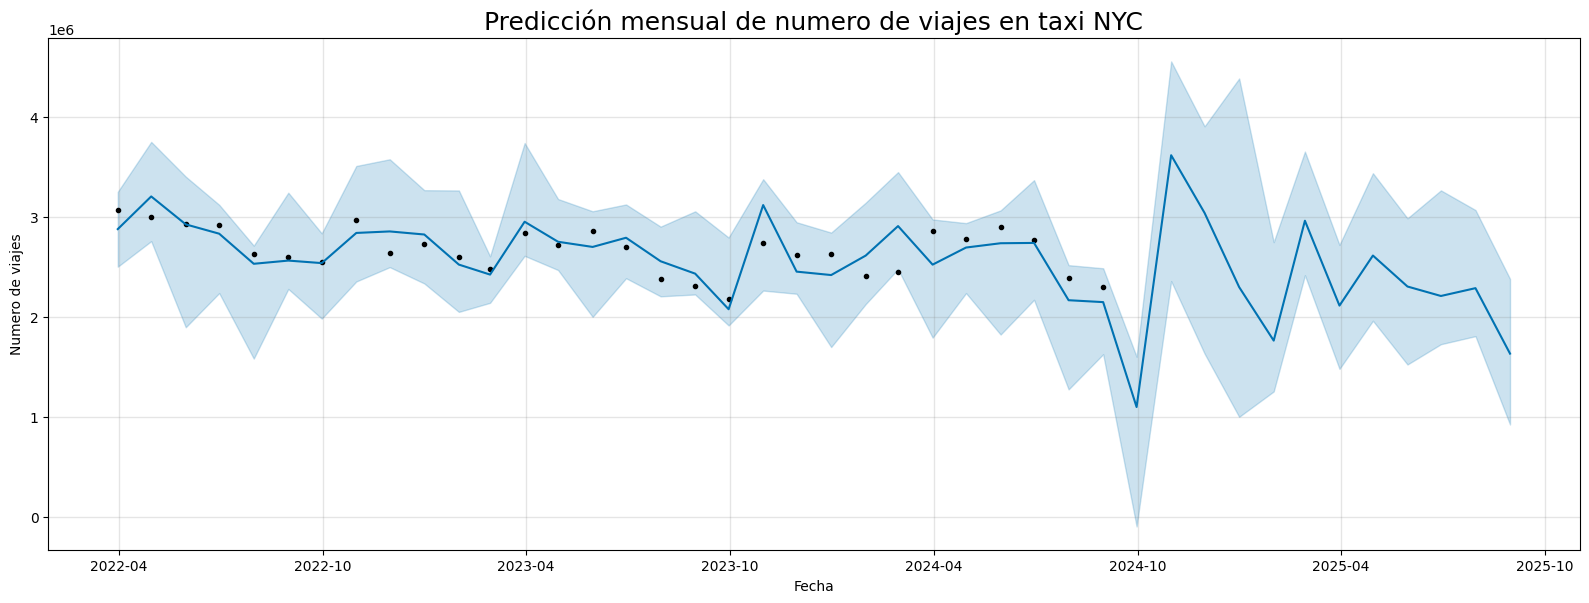

In [12]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

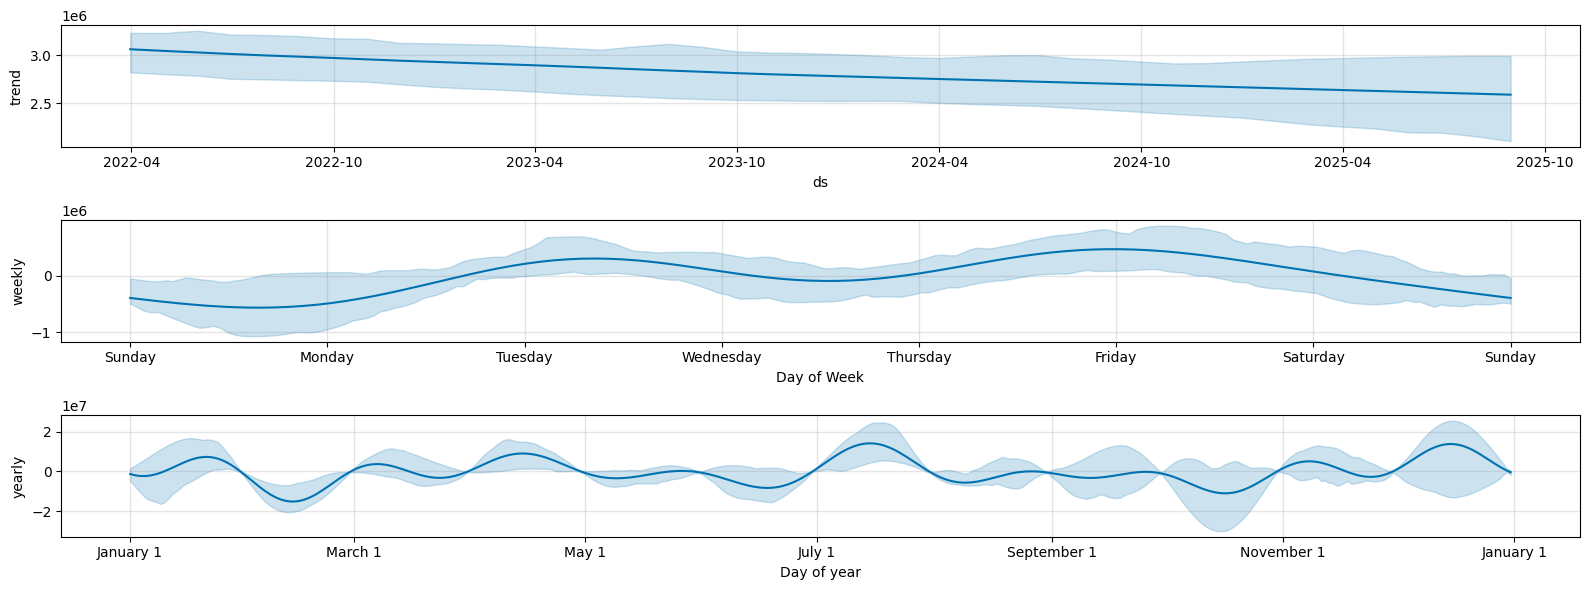

In [13]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [14]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [24]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/82tnre41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/kuzra6s9.json
22:51:25 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=920', 'data', 'file=/tmp/tmplnvzjdhf/82tnre41.json', 'init=/tmp/tmplnvzjdhf/kuzra6s9.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelhan54rbs/prophet_model-20241118225125_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=920', 'data', 'file=/tmp/tmplnvzjdhf/82tnre41.json', 'init=/tmp/tmplnvzjdhf/kuzra6s9.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelhan54rbs/prophet_model-20241118225125_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:ru

22:51:26 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=920', 'data', 'file=/tmp/tmplnvzjdhf/82tnre41.json', 'init=/tmp/tmplnvzjdhf/kuzra6s9.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelhan54rbs/prophet_model-20241118225125_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelhan54rbs/prophet_model-20241118225125_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelhan54rbs/prophet_model-20241118225125_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)
  

In [26]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,-6.534545e+06,-1.493541e+07,5.107508e+06,2179200,2023-09-01
1,2023-10-31,-8.580134e+05,-1.489569e+07,1.355158e+07,2736389,2023-09-01
2,2023-11-30,2.693381e+06,1.512041e+06,3.712480e+06,2616757,2023-09-01
3,2023-12-31,2.215527e+06,8.796021e+05,3.882930e+06,2625768,2023-09-01
4,2024-01-31,3.410507e+06,2.586904e+06,4.595395e+06,2409342,2023-09-01
5,2024-02-29,4.684492e+06,3.019665e+05,1.006582e+07,2448952,2023-09-01
6,2024-03-31,-5.491635e+06,-1.102593e+07,3.702443e+06,2858661,2023-09-01
7,2024-04-30,1.417502e+06,-1.149016e+07,1.115290e+07,2777362,2023-09-01
8,2024-05-31,5.802801e+06,2.093857e+06,9.785133e+06,2899539,2023-09-01
9,2024-06-30,-4.720936e+06,-1.107718e+07,4.937375e+06,2767032,2023-09-01


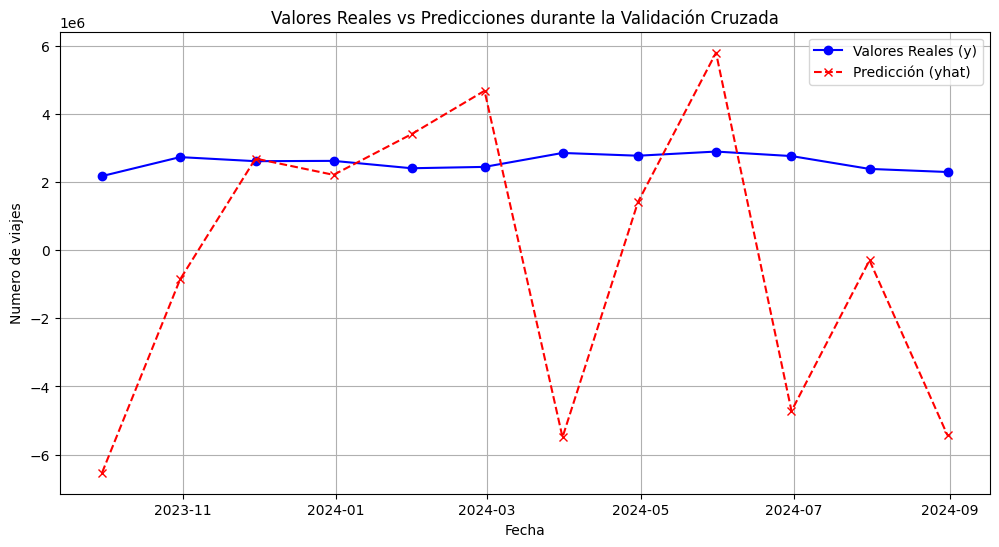

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
df_p_1 = performance_metrics(df_cv_1)
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,2.484504e+13,3.879460e+06,3.879460e+06,1.536032,1.536032,1.207062,0.916667
std,109 days 20:33:46.987269072,3.054472e+13,3.268832e+06,3.268832e+06,1.352218,1.352218,0.848654,0.288675
min,29 days 00:00:00,5.871301e+09,7.662442e+04,7.662442e+04,0.029282,0.029282,0.028860,0.000000
25%,113 days 06:00:00,1.637497e+12,1.270186e+06,1.270186e+06,0.471101,0.471101,0.556096,1.000000
50%,196 days 12:00:00,7.820140e+12,2.794329e+06,2.794329e+06,1.062499,1.062499,1.333619,1.000000
75%,280 days 12:00:00,5.700991e+13,7.549733e+06,7.549733e+06,2.759866,2.759866,2.000000,1.000000
max,365 days 00:00:00,7.592935e+13,8.713745e+06,8.713745e+06,3.998598,3.998598,2.000000,1.000000


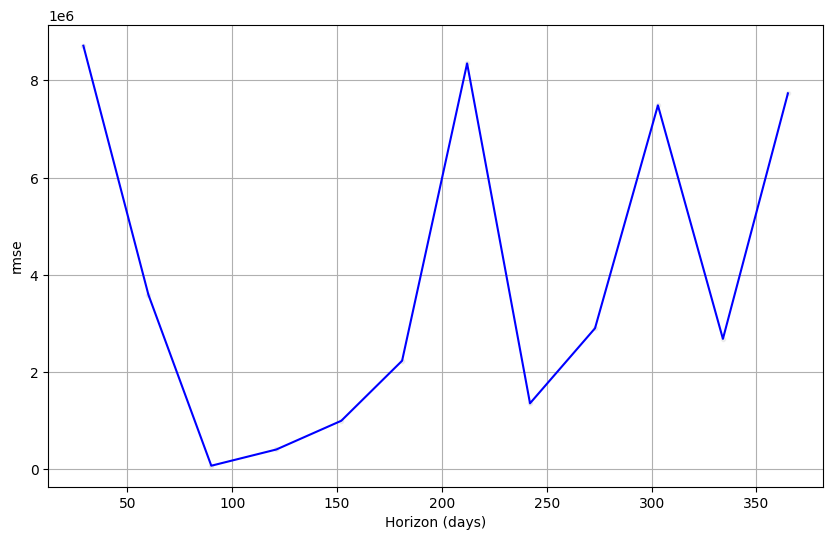

In [29]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [30]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 3879460.4559472036


In [31]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 3879460.4559472036


In [32]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [33]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,2.484504e+13,4.984480e+06,3.879460e+06,1.536032,1.062499,1.207062,0.916667


In [35]:
forecast_1.to_csv('forecast_mensual.csv')